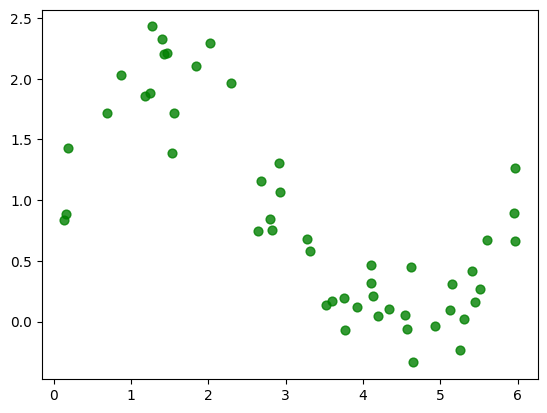

In [24]:
import pandas as pd

data = pd.read_csv('F:/DATA SCIENCE/[Skillbox] Профессия‌ ‌Data‌ ‌Scientist‌ (2020)/1 Data Scientist. ML. Начальный уровень/03/non_linear.csv')
data.head()

import matplotlib.pyplot as plt
%matplotlib inline
degree = 12
plt.scatter(data.x_train, data.y_train, 40, 'g', 'o', alpha=0.8)
plt.show()

Степень полинома 3
Ошибка на валидации 0.051
Ошибка на обучении 0.077
[6 9 8 5 1 7 0 3 2 4]
[4.64163239 3.31455321 5.44668516 5.30831672 5.94984314 2.91202682
 0.68555275 4.10702703 1.27047391 1.25160548]
37   -0.336120
23    0.579166
44    0.165727
42    0.024936
47    0.892383
20    1.304593
3     1.717309
30    0.315611
7     2.430015
6     1.878928
Name: y_train, dtype: float64
Норма векторов весов 	 |w|= 2.19


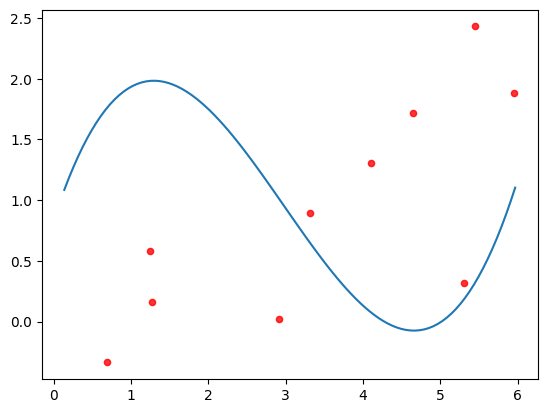

In [42]:
from sklearn.linear_model import LinearRegression
from numpy.linalg import norm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

def generate_degrees(source_data: list, degree: int):

    return np.array([
        source_data**n for n in range(1, degree + 1)
    ]).T

def train_polynomial(degree, data):
    """ Генерация датасета и обучения модели"""
    X = generate_degrees(data['x_train'], degree)
    y = data.y_train
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=10)
    model = LinearRegression().fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    y_pred_train = model.predict(X_train)
    error_valid = mean_squared_error(y_valid, y_pred)
    error_train = mean_squared_error(y_train, y_pred_train)
    print(
        "Степень полинома %d\nОшибка на валидации %.3f\nОшибка на обучении %.3f" %
        (degree, error_valid, error_train)
    )
    order_test = np.argsort(X_valid[:,0])

    print(order_test)
    print(X_valid[:,0])
    print(y_valid)
    plt.scatter(X_valid[:,0][order_test],y_valid,
                20, 'r', 'o', alpha=0.8)
    print("Норма векторов весов \t |w|= %.2f" % norm(model.coef_))
    # visualization
    x_linspace = np.linspace(data['x_train'].min(), data['x_train'].max(), num = 100)
    y_linspace = model.predict(generate_degrees(x_linspace, degree))
    plt.plot(x_linspace, y_linspace)
    return error_valid, error_train, norm(model.coef_)
    
train_polynomial(degree, data)

degrees = []
valid_errors = []
train_errors = []
w_norm = []

Степень полинома 3
Ошибка на валидации 0.051
Ошибка на обучении 0.077
[6 9 8 5 1 7 0 3 2 4]
[4.64163239 3.31455321 5.44668516 5.30831672 5.94984314 2.91202682
 0.68555275 4.10702703 1.27047391 1.25160548]
37   -0.336120
23    0.579166
44    0.165727
42    0.024936
47    0.892383
20    1.304593
3     1.717309
30    0.315611
7     2.430015
6     1.878928
Name: y_train, dtype: float64
Норма векторов весов 	 |w|= 2.19


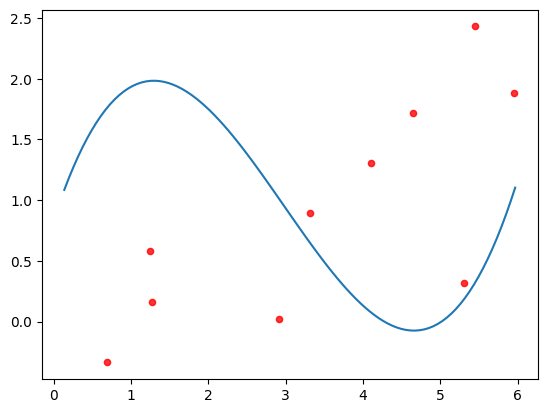

In [43]:
degree = 3
error_valid, error_train, coef_norm = train_polynomial(degree, data)
degrees.append(degree)
valid_errors.append(error_valid)
train_errors.append(error_train)
w_norm.append(coef_norm)

Степень полинома 5
Ошибка на валидации 0.063
Ошибка на обучении 0.069
[6 9 8 5 1 7 0 3 2 4]
[4.64163239 3.31455321 5.44668516 5.30831672 5.94984314 2.91202682
 0.68555275 4.10702703 1.27047391 1.25160548]
Норма векторов весов 	 |w|= 3.31


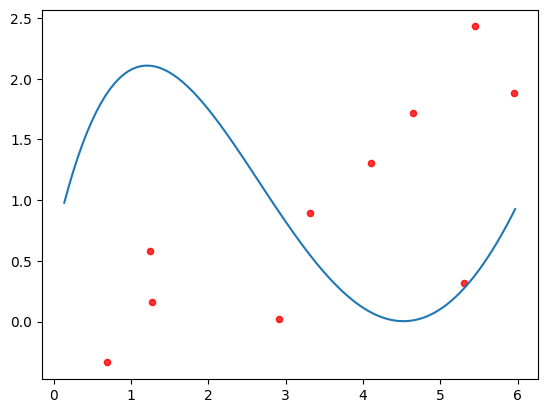

In [35]:
degree = 5
error_valid, error_train, coef_norm = train_polynomial(degree, data)
degrees.append(degree)
valid_errors.append(error_valid)
train_errors.append(error_train)
w_norm.append(coef_norm)

Степень полинома 10
Ошибка на валидации 0.122
Ошибка на обучении 0.052
[6 9 8 5 1 7 0 3 2 4]
[4.64163239 3.31455321 5.44668516 5.30831672 5.94984314 2.91202682
 0.68555275 4.10702703 1.27047391 1.25160548]
Норма векторов весов 	 |w|= 120.14


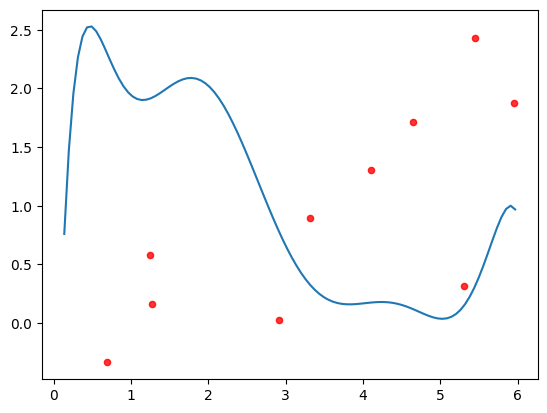

In [36]:
degree = 10
error_valid, error_train, coef_norm = train_polynomial(degree, data)
degrees.append(degree)
valid_errors.append(error_valid)
train_errors.append(error_train)
w_norm.append(coef_norm)